This simulation represent the folowwing problem : 

We have 9 different coupon, we do n random draws, and the objective is to find out how long it will take to get them all

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import norm, lognorm


In [12]:
## The draw simulation

#number of simulation
NB_SIMU = 100000
results = []

for _ in range(NB_SIMU):
    drawn = set()
    nb_tries = 0
    while len(drawn) <9:
        chiffre = np.random.randint(0,9)
        drawn.add(chiffre)
        nb_tries+=1
    results.append(drawn)

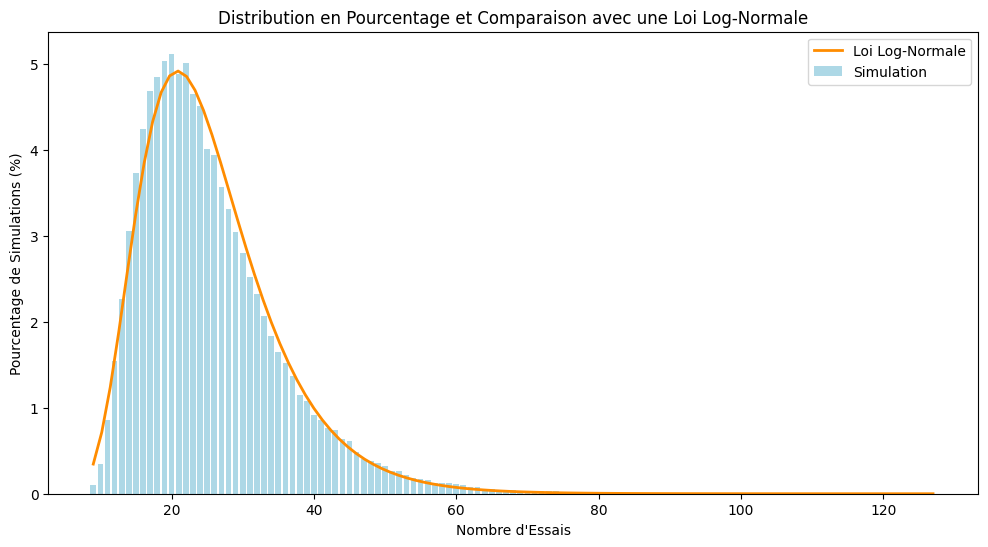

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Calculate the number of occurrences for each trial count
values, counts = np.unique(results, return_counts=True)
percentages = (counts / np.sum(counts)) * 100  # Convert counts to percentages

# Calculate the standard deviation and mean of the logarithm of the results
sigma = np.std(np.log(results))
mu = np.mean(np.log(results))
scale = np.exp(mu)  # exp(mu) is the mean of the log of the data

# Create a range of values from min to max of results for plotting
normal_values = np.linspace(min(results), max(results), 100)

# Calculate the log-normal distribution PDF scaled to percentages
pdf_lognormal = lognorm.pdf(normal_values, sigma, scale=scale) * 100  # Scale to percentage

# Create a bar chart with percentages
plt.figure(figsize=(12, 6))
plt.bar(values, percentages, color='lightblue', label='Simulation')

# Add the curve of the log-normal distribution
plt.plot(normal_values, pdf_lognormal, color='darkorange', linewidth=2, label='Log-Normal Distribution')

# Title and labels
plt.title('Percentage Distribution and Comparison with a Log-Normal Distribution')
plt.xlabel('Number of Trials')
plt.ylabel('Percentage of Simulations (%)')
plt.legend()
plt.show()


In [17]:
kurtosis_value = kurtosis(results, fisher = True)
kurtosis_value

3.282739211465298